In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

C:\Users\KimDongyoung\Desktop\git_LGaimers5_final\Lg_aimers5\final_data\train.csv

In [29]:
ROOT_DIR = "C:/Users/KimDongyoung/Desktop/git_LGaimers5_final/Lg_aimers5/final_data/"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "clean_final_train.csv"))
train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Collect Date_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,2024-04-25 11:10:00,1,OK,240.0,NaN,...,127,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,2023-09-19 14:30:00,1,OK,240.0,NaN,...,185,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,2024-03-05 09:30:00,1,OK,1000.0,NaN,...,73,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,2023-09-25 15:40:00,1,OK,1000.0,NaN,...,268,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,2023-06-27 13:20:00,1,OK,240.0,NaN,...,121,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,2023-09-14 15:50:00,1,OK,240.0,NaN,...,318,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,2024-04-10 14:20:00,1,OK,1000.0,NaN,...,197,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,2024-02-22 08:40:00,1,OK,240.0,NaN,...,27,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,2023-07-25 11:00:00,1,OK,1000.0,NaN,...,117,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal


In [30]:
df_hand = pd.read_excel(os.path.join(ROOT_DIR, "hand_data.xlsx"))
df_hand

,day,start_time,end_time,Dam Thickness - 1time / day,Fill thickness - 1time / day,Fill cure energy (mJ) - Every break time,Fill cure power (mW) - Every break time,Line Temp. - Every break time,Line humidity - Every break time,OCR gap - Line#1 stage1,OCR gap - Line#1 stage2,OCR gap - Line#1 stage3,OCR gap - Line #2 stage1,OCR gap - Line #2 stage2,OCR gap - Line #2 stage3
0,240319,08:00:00,10:30:00,454.0,193.0,1728.0,2919.0,23.4,56.6,1.2,1.000,1.200,1.2,0.900,1.4
1,240319,10:45:00,12:00:00,454.0,193.0,1754.0,2962.0,24.0,50.9,1.2,1.000,1.200,1.2,0.900,1.4
2,240319,13:00:00,15:00:00,454.0,193.0,1708.0,2887.0,24.5,49.6,1.2,1.000,1.200,1.2,0.900,1.4
3,240319,15:15:00,18:00:00,454.0,193.0,1751.0,2946.0,24.7,53.4,1.2,1.000,1.200,1.2,1.200,1.4
4,240319,18:30:00,20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,240428,08:00:00,10:30:00,478.0,232.0,1642.0,2952.0,24.6,53.0,1.0,1.232,1.466,1.2,1.167,1.5
101,240428,10:45:00,12:00:00,478.0,232.0,1679.0,2942.0,24.8,52.7,1.0,1.232,1.466,1.2,1.167,1.5
102,240428,13:00:00,15:00:00,478.0,232.0,1552.0,2941.0,24.6,55.5,1.0,1.232,1.466,1.2,1.167,1.5
103,240428,15:15:00,18:00:00,478.0,232.0,1552.0,2934.0,24.3,54.6,1.0,1.232,1.466,1.2,1.167,1.5


In [31]:
#train_data.info(verbose=True)

# 'Process Desc'를 포함하는 열 이름 필터링
filter_col = train_data.filter(like='Collect Date_').columns

print("< Process Desc 포함 변수 >")
for col in filter_col:
    print(col)

< Process Desc 포함 변수 >
Collect Date_Dam
Collect Date_AutoClave
Collect Date_Fill1
Collect Date_Fill2


In [32]:
# Extract only the 'Collect Date' columns
collect_date_columns = train_data.filter(like='Collect Date_').columns
collect_date_data = train_data[collect_date_columns]
collect_date_data

,Collect Date_Dam,Collect Date_AutoClave,Collect Date_Fill1,Collect Date_Fill2
0,2024-04-25 11:10:00,2024-04-25 11:50:00,2024-04-25 11:20:00,2024-04-25 11:20:00
1,2023-09-19 14:30:00,2023-09-19 15:00:00,2023-09-19 14:30:00,2023-09-19 14:30:00
2,2024-03-05 09:30:00,2024-03-05 10:10:00,2024-03-05 09:30:00,2024-03-05 09:30:00
3,2023-09-25 15:40:00,2023-09-25 16:20:00,2023-09-25 15:40:00,2023-09-25 15:40:00
4,2023-06-27 13:20:00,2023-06-27 14:00:00,2023-06-27 13:20:00,2023-06-27 13:20:00
...,...,...,...,...
40501,2023-09-14 15:50:00,2023-09-14 16:30:00,2023-09-14 15:50:00,2023-09-14 15:50:00
40502,2024-04-10 14:20:00,2024-04-10 15:00:00,2024-04-10 14:20:00,2024-04-10 14:20:00
40503,2024-02-22 08:40:00,2024-02-22 09:20:00,2024-02-22 08:50:00,2024-02-22 08:50:00
40504,2023-07-25 11:00:00,2023-07-25 11:40:00,2023-07-25 11:00:00,2023-07-25 11:00:00


In [33]:
def plot_box(df, col_name):
    """
    주어진 데이터프레임과 열 이름에 대해 박스 플롯을 그리는 함수.

    Parameters:
    dataframe (pd.DataFrame): 데이터프레임
    column_name (str): 열 이름
    """
    plt.figure(figsize=(7, 4))
    plt.boxplot(df[col_name], vert=False)
    plt.xlabel(col_name)
    plt.title(f'Box Plot of {col_name}')
    plt.show()

def value_counts_ratio(df, col_name, target_name='target'):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))

def summarize_group(df, group_by_columns):
    # 데이터프레임을 그룹화
    grouped_df = df.groupby(group_by_columns)
    
    # 결과를 저장할 리스트 초기화
    results = []
    
    # 그룹화된 데이터프레임의 내용을 확인하는 코드
    for name, group in grouped_df:
        # 그룹의 갯수 계산
        group_count = group.shape[0]
        
        # 'target' 변수의 'AdNormal' 비율과 갯수 계산
        adnormal_count = group['target'].value_counts().get('AbNormal', 0)
        adnormal_ratio = adnormal_count / group_count
        
        # 결과 리스트에 추가
        results.append([name, adnormal_count, adnormal_ratio, group_count])
    
    # 결과 리스트를 데이터프레임으로 변환
    results_df = pd.DataFrame(results, columns=['group', "'AdNormal' count", 'ratio', 'Total'])
    
    # 그룹화된 변수들의 이름을 제목행으로 출력
    print(f"Grouped by: {', '.join(group_by_columns)}")
    print()
    # 데이터프레임 출력
    print(results_df)

# 예시코드
# summarize_grouped_data(train_data, ['1st Pressure Collect Result_AutoClave', '1st Pressure Unit Time_AutoClave'])

def plot_ratio(df, group_by_column, target_column='target', abnormal_value='AbNormal'):
    # 데이터프레임을 그룹화
    grouped_df = df.groupby(group_by_column)
    
    # 결과를 저장할 리스트 초기화
    results = []
    
    # 그룹화된 데이터프레임의 내용을 확인하는 코드
    for name, group in grouped_df:
        # 그룹의 갯수 계산
        group_count = group.shape[0]
        
        # 'target' 변수의 'AbNormal' 비율과 갯수 계산
        abnormal_count = group[target_column].value_counts().get(abnormal_value, 0)
        abnormal_ratio = abnormal_count / group_count
        
        # 결과 리스트에 추가
        results.append([name, abnormal_count, abnormal_ratio, group_count])
    
    # 결과 리스트를 데이터프레임으로 변환
    results_df = pd.DataFrame(results, columns=['group', f"'{abnormal_value}' count", 'ratio', 'Total'])
    
    # 그래프 크기 설정
    plt.figure(figsize=(10, 5))
    
    # 막대 그래프 생성
    ax = results_df.plot(kind='bar', x='group', y='ratio', legend=False)
    
    # 각 막대 위에 AbNormal 갯수와 총 갯수 표시
    for i, (abnormal_count, total) in enumerate(zip(results_df[f"'{abnormal_value}' count"], results_df['Total'])):
        ax.text(i, results_df['ratio'][i], f'{abnormal_count} ({total})', ha='center', va='bottom', fontsize=8)
    
     # 그래프 제목 및 축 레이블 설정
    ax.set_title(f'{abnormal_value} Ratio by {group_by_column}')
    ax.set_xlabel(group_by_column)
    ax.set_ylabel(f'{abnormal_value} Ratio')
   
    # 그래프 출력
    plt.show()

def plot_ratio_boxplot(data, time_ratio_column, target_column='target'):
    # 그래프 스타일 설정
    sns.set(style="whitegrid")

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=time_ratio_column, y=target_column, data=data)

    # 그래프 제목 및 레이블 설정
    plt.title(f'{time_ratio_column} vs {target_column}')
    plt.xlabel(time_ratio_column)
    plt.ylabel(target_column)

    # 그래프 출력
    plt.show()

# 함수 호출 예제
#plot_ratio_boxplot(train_data, 'time_ratio_Dam')

In [34]:
summarize_group(train_data, [#'Collect Date_Dam'
                              'Collect Date_Fill1'
                             , 'Collect Date_Fill2'])
                             #, 'Collect Date_AutoClave'])

Grouped by: Collect Date_Fill1, Collect Date_Fill2

                                            group  'AdNormal' count  ratio  \
0      (2023-05-04 09:10:00, 2023-05-04 09:20:00)                 1    1.0   
1      (2023-05-04 09:20:00, 2023-05-04 09:20:00)                 2    1.0   
2      (2023-05-04 11:20:00, 2023-05-04 11:20:00)                 1    1.0   
3      (2023-05-05 09:40:00, 2023-05-05 09:40:00)                 1    1.0   
4      (2023-05-05 09:50:00, 2023-05-05 09:50:00)                 1    1.0   
...                                           ...               ...    ...   
13532  (2024-04-28 18:10:00, 2024-04-28 18:20:00)                 0    0.0   
13533  (2024-04-28 18:20:00, 2024-04-28 18:20:00)                 0    0.0   
13534  (2024-04-28 18:20:00, 2024-04-28 18:30:00)                 0    0.0   
13535  (2024-04-28 18:30:00, 2024-04-28 18:30:00)                 0    0.0   
13536  (2024-04-28 18:40:00, 2024-04-28 18:40:00)                 0    0.0   

       Tota

In [35]:
train_data['Collect Date_Dam'] = pd.to_datetime(train_data['Collect Date_Dam']) 
train_data['Collect Date_Fill1'] = pd.to_datetime(train_data['Collect Date_Fill1']) 
train_data['Collect Date_Fill2'] = pd.to_datetime(train_data['Collect Date_Fill2']) 
train_data['Collect Date_AutoClave'] = pd.to_datetime(train_data['Collect Date_AutoClave']) 

In [36]:
# 각 열 간의 시간 차이를 계산하여 새로운 변수 생성
train_data['time_diff_Dam_Fill1'] = (train_data['Collect Date_Fill1'] - train_data['Collect Date_Dam']).dt.total_seconds() / 60
train_data['time_diff_Fill1_Fill2'] = (train_data['Collect Date_Fill2'] - train_data['Collect Date_Fill1']).dt.total_seconds() / 60
train_data['time_diff_Fill2_AutoClave'] = (train_data['Collect Date_AutoClave'] - train_data['Collect Date_Fill2']).dt.total_seconds() / 60
train_data['time_diff_Dam_AutoClave'] = (train_data['Collect Date_AutoClave'] - train_data['Collect Date_Dam']).dt.total_seconds() / 60

# 결과 확인
print(train_data[['time_diff_Dam_Fill1', 'time_diff_Fill1_Fill2', 'time_diff_Fill2_AutoClave', 'time_diff_Dam_AutoClave']].head())

   time_diff_Dam_Fill1  time_diff_Fill1_Fill2  time_diff_Fill2_AutoClave  \
0                 10.0                    0.0                       30.0   
1                  0.0                    0.0                       30.0   
2                  0.0                    0.0                       40.0   
3                  0.0                    0.0                       40.0   
4                  0.0                    0.0                       40.0   

   time_diff_Dam_AutoClave  
0                     40.0  
1                     30.0  
2                     40.0  
3                     40.0  
4                     40.0  


In [40]:
summarize_group(train_data,['time_diff_Dam_Fill1'])
summarize_group(train_data,['time_diff_Fill1_Fill2'])
summarize_group(train_data,['time_diff_Fill2_AutoClave'])
summarize_group(train_data,['time_diff_Dam_AutoClave'])

Grouped by: time_diff_Dam_Fill1

       group  'AdNormal' count     ratio  Total
0     (0.0,)              1831  0.056446  32438
1    (10.0,)               461  0.057553   8010
2    (20.0,)                 1  1.000000      1
3    (30.0,)                 9  1.000000      9
4    (40.0,)                12  1.000000     12
5    (50.0,)                 7  1.000000      7
6    (60.0,)                 6  1.000000      6
7    (70.0,)                 2  1.000000      2
8    (80.0,)                 1  1.000000      1
9    (90.0,)                 6  1.000000      6
10  (110.0,)                 3  1.000000      3
11  (120.0,)                 2  1.000000      2
12  (140.0,)                 1  1.000000      1
13  (160.0,)                 3  1.000000      3
14  (220.0,)                 1  1.000000      1
15  (290.0,)                 1  1.000000      1
16  (500.0,)                 2  1.000000      2
17  (810.0,)                 1  1.000000      1
Grouped by: time_diff_Fill1_Fill2

       group  'AdNor

In [46]:
# pandas 출력 설정 변경
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.max_rows', None)     # 모든 행 출력

summarize_group(train_data, ['time_diff_Dam_Fill1', 'time_diff_Fill1_Fill2'])   #  (0,0), (0,10), (10,0) 을 제외하고 전부 abnormal

Grouped by: time_diff_Dam_Fill1, time_diff_Fill1_Fill2

            group  'AdNormal' count     ratio  Total
0      (0.0, 0.0)              1497  0.054813  27311
1     (0.0, 10.0)               310  0.060749   5103
2     (0.0, 30.0)                 3  1.000000      3
3     (0.0, 40.0)                 3  1.000000      3
4     (0.0, 50.0)                 2  1.000000      2
5     (0.0, 60.0)                 2  1.000000      2
6     (0.0, 70.0)                 1  1.000000      1
7     (0.0, 80.0)                 4  1.000000      4
8     (0.0, 90.0)                 2  1.000000      2
9    (0.0, 100.0)                 1  1.000000      1
10   (0.0, 120.0)                 1  1.000000      1
11   (0.0, 160.0)                 3  1.000000      3
12   (0.0, 170.0)                 1  1.000000      1
13   (0.0, 470.0)                 1  1.000000      1
14    (10.0, 0.0)               452  0.056500   8000
15   (10.0, 10.0)                 1  0.500000      2
16   (10.0, 20.0)                 1  1.0000

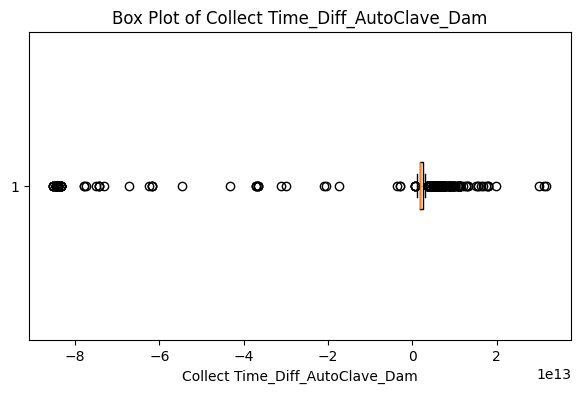

In [24]:
plot_box(train_data, 'Collect Time_Diff_AutoClave_Dam')

In [42]:
def shift_row_values(row, start_col_index, move_limit, total_columns):
    move_count = 0  # 이동 카운터 초기화
    for col_index in range(start_col_index, total_columns):  # 모든 열을 대상으로
        if pd.isna(row[col_index]) or row[col_index] == "OK":  # 빈값 또는 "OK" 확인
            # 빈값 또는 "OK"가 발견되면 현재 위치부터 이후 3칸 간격의 변수 값을 앞으로 이동
            for shift_index in range(col_index, total_columns - 3, 3):  # 3칸씩 이동
                # 값을 이동
                row[shift_index] = row[shift_index + 3]
                row[shift_index + 3] = None  # 원래 자리 비우기
                move_count += 1  # 이동 카운트 증가

                if move_count >= move_limit:  # 설정된 횟수에 도달하면 중지
                    break
        if move_count >= move_limit:  # 외부 루프에서도 체크
            break
    return row

def shift_values(data, start_col_index, move_limit):
    total_columns = data.shape[1]
    data = data.apply(shift_row_values, axis=1, args=(start_col_index, move_limit, total_columns))
    return data

# 변수 이름 설정 및 시작 열 인덱스 및 이동 횟수 설정
variables_with_limits = [
    ('HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 52),
    ('HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 22),
    ('HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 22)
]

# 각 변수에 대해 함수 호출
def process_data(data, variables_with_limits, output_file):
    for start_var, move_limit in variables_with_limits:
        start_col_index = data.columns.get_loc(start_var)  # 각 변수의 시작 열 인덱스 찾기
        data = shift_values(data, start_col_index, move_limit)
    data.to_csv(output_file, index=False)
    print(f'데이터가 성공적으로 수정되고 저장되었습니다: {output_file}')

# 데이터 처리
process_data(train_data, variables_with_limits, './data/clean_train_data.csv')
#process_data(test_data, variables_with_limits, './data/clean_test_data.csv')

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_39088\221263641.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(row[col_index]) or row[col_index] == "OK":  # 빈값 또는 "OK" 확인
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_39088\221263641.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[shift_index] = row[shift_index + 3]
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_39088\221263641.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by pos